In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [17]:
class LassoRegression:
    def __init__(self, alpha=0.01, max_iter=10000, tol=10):
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.coef_ = np.zeros(n_features)
        self.intercept_ = np.mean(y)
        
        for iteration in range(self.max_iter):
            for j in range(n_features):
                X_j = X[:, j]
                y_pred = self.predict(X)
                r = y - y_pred + self.coef_[j] * X_j
                z = np.dot(X_j, X_j)
                self.coef_[j] = self._soft_thresholding_operator(np.dot(X_j, r) / z, self.alpha / z)
                
            y_pred = self.predict(X)
            residual = y - y_pred
            RSS = np.dot(residual, residual)
            if iteration > 0 and abs(RSS - RSS_old) < self.tol:
                break
            RSS_old = RSS
            
    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_
    
    def _soft_thresholding_operator(self, x, lambda_):
        if x > 0 and lambda_ < abs(x):
            return x - lambda_
        elif x < 0 and lambda_ < abs(x):
            return x + lambda_
        else:
            return 0
    
def dataset(path):
    df = pd.read_csv(r"C:\Users\Alisha DJ\Downloads\Boston (1).csv")
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    return X, y

In [18]:
df = pd.read_csv(r"C:\Users\Alisha DJ\Downloads\Boston (1).csv")

In [19]:
# Load your dataset
X, y = dataset(r"C:\Users\Alisha DJ\Downloads\Boston (1).csv")

# Split the dataset into training and testing sets
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

# HYPERPARAMETER TUNING

In [20]:
# Hyperparameter tuning

alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
max_iters = [100, 500, 1000, 5000]
tols = [0.0001, 0.001, 0.01, 0.1]
best_r2 = 0
best_params = None  

for alpha in alphas:
    for tol in tols:
        for max_iter in max_iters:
            lasso = LassoRegression(alpha=alpha, tol=tol, max_iter= max_iter)
            lasso.fit(X_train, y_train)
            y_pred = lasso.predict(X_test)
            r2 = r2_score(y_test, y_pred)
            if r2 > best_r2:
                best_r2 = r2
                best_params = {'alpha': alpha, 'tol': tol, 'max_iter': max_iter}
            


# Train the model with best hyperparameters
lasso = LassoRegression(alpha=best_params['alpha'], tol=best_params['tol'], max_iter=best_params['max_iter'])
lasso.fit(X_train, y_train)

In [21]:
# Evaluate the model
y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)
print("Best hyperparameters:", best_params)



R2 score: 0.6629276562264362
Best hyperparameters: {'alpha': 10.0, 'tol': 0.0001, 'max_iter': 1000}


# Using sklearn

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['MEDV'] = boston.target


C:\Users\Alisha DJ\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [24]:
# Create new feature RM_LSTAT
data['RM_LSTAT'] = data['RM'] * data['LSTAT']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1), data['MEDV'], test_size=0.2, random_state=42)

# Fit linear regression model to the training data
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict on the testing data
y_pred = reg.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)


R2 score: 0.7763006990231972


# VIZUALIZATION

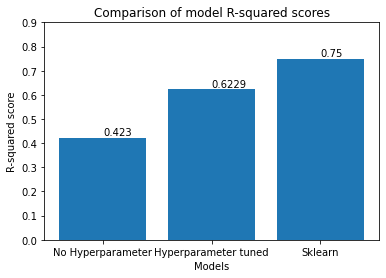

In [25]:
import matplotlib.pyplot as plt

# Define the values for the bars
no_hyperparam = 0.423
hyperparam_tuned = 0.6229
sklearn = 0.75

# Create the bar plot
plt.bar(["No Hyperparameter", "Hyperparameter tuned", "Sklearn"], [no_hyperparam, hyperparam_tuned, sklearn])

# Add annotations to the bars
plt.text(0, no_hyperparam + 0.01, str(no_hyperparam))
plt.text(1, hyperparam_tuned + 0.01, str(hyperparam_tuned))
plt.text(2, sklearn + 0.01, str(sklearn))

# Set the y-axis limits
plt.ylim(0, 0.9)

# Add labels to the plot
plt.xlabel("Models")
plt.ylabel("R-squared score")
plt.title("Comparison of model R-squared scores")

# Display the plot
plt.show()
